# Imports

In [1]:
import pandas as pd
import warnings
import nltk
import re
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import json

warnings.filterwarnings("ignore")

# Data Downloading

In [2]:
import datasets

dataset = datasets.load_dataset("cnn_dailymail", '3.0.0')

Found cached dataset cnn_dailymail (C:/Users/Seif Maged/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de)
100%|██████████| 3/3 [00:01<00:00,  2.93it/s]


# StopWords

In [3]:
stopwords_list = stopwords.words('english')
stopwords_list.extend(['cnn','reuters'])

# Data Formatting

## Train Split

In [4]:
train_data = dataset['train']

train_df = train_data.to_pandas()
train_df = train_df.sample(n = round(len(train_df)*0.25) , random_state=42) # sampled at 25%
train_df
# train_df.to_csv("train_split.csv", index=None)

,article,highlights,id
272581,Nasa has warned of an impending asteroid pass ...,2004 BL86 will pass about three times the dist...,6ccb7278e86893ad3609d30ecb5c9ea902fb9527
772,"BAGHDAD, Iraq (CNN) -- Iraq's most powerful Su...","Iraqi Islamic Party calls Quran incident ""blat...",d4f57e3c18c38696345fb7a3d76a151bb9c5123b
171868,By . David Kent . Andy Carroll has taken an un...,Carroll takes to Instagram to post selfie ahea...,c9ae9fc314adcc92d3835b0437a1c44e9e233e1c
63167,Los Angeles (CNN) -- Los Angeles has long been...,Pop stars from all over Europe are setting the...,5b5a383dc8f9487857787ced5426154394dd99db
68522,London (CNN) -- Few shows can claim such an au...,NEW: Young athletes light the Olympic cauldron...,2813505a990ad24071496c0d0936e40847eb6194
...,...,...,...
146978,By . Daily Mail Reporter . PUBLISHED: . 12:01 ...,Dr. Jim Withers has been treating homeless peo...,3a094626c7178634b330d43af755fc493445d4be
209646,It may have taken 36 years but the iconic holo...,The castAR system uses glasses fitted with pro...,87dbc841814ff9d010d116f1a2e9308ce64eb499
239253,Offensive: ITV reporter Richard Pallot twice r...,Richard Pallot TWICE called black players 'col...,b40e23358b205f554731fe58314a9134272ba878
126807,By . David Mccormack and Snejana Farberov . PU...,Christian Hoard psted the tweet Wednesday but ...,74d6c1fc078d5751259b45a9fd39bcfc76fbb1a9


In [5]:
train_df.head()

,article,highlights,id
272581,Nasa has warned of an impending asteroid pass ...,2004 BL86 will pass about three times the dist...,6ccb7278e86893ad3609d30ecb5c9ea902fb9527
772,"BAGHDAD, Iraq (CNN) -- Iraq's most powerful Su...","Iraqi Islamic Party calls Quran incident ""blat...",d4f57e3c18c38696345fb7a3d76a151bb9c5123b
171868,By . David Kent . Andy Carroll has taken an un...,Carroll takes to Instagram to post selfie ahea...,c9ae9fc314adcc92d3835b0437a1c44e9e233e1c
63167,Los Angeles (CNN) -- Los Angeles has long been...,Pop stars from all over Europe are setting the...,5b5a383dc8f9487857787ced5426154394dd99db
68522,London (CNN) -- Few shows can claim such an au...,NEW: Young athletes light the Olympic cauldron...,2813505a990ad24071496c0d0936e40847eb6194


## Validation Split

In [6]:
val_data = dataset['validation']
val_df = val_data.to_pandas()
val_df

# val_df.to_csv("val_split.csv", index=None)

,article,highlights,id
0,"(CNN)Share, and your gift will be multiplied. ...",Zully Broussard decided to give a kidney to a ...,a4942dd663020ca54575471657a0af38d82897d6
1,"(CNN)On the 6th of April 1996, San Jose Clash ...",The 20th MLS season begins this weekend .\nLea...,4157bc4da185971e2742f349d69a037343bc0d95
2,"(CNN)French striker Bafetimbi Gomis, who has a...",Bafetimbi Gomis collapses within 10 minutes of...,60736693e3b1b32d14337a317190c6606e879a85
3,(CNN)It was an act of frustration perhaps more...,Rory McIlroy throws club into water at WGC Cad...,8cdf9cc3ed0276b7a7944cc18ba459355b5984ad
4,(CNN)A Pennsylvania community is pulling toget...,"Cayman Naib, 13, hasn't been heard from since ...",2e6613d531843515bf5401286cc3e45c4df530d2
...,...,...,...
13363,"It is the dream of many young children, the ch...","The town in Valley Center, San Diego, has been...",5ab020397649fecae34c9e3ac2f7a6c67a5f3153
13364,It’s the type of encounter that can send panic...,Photographer Graham Hewer captured the jaw-dro...,b189166be7b1dc93f635d7860d4978498608ae07
13365,A group of tourists to the Bahamas enjoyed one...,The pigs swim through the crystal clear sea an...,c513500c9c53726b4ed0065b32bbca651c64b368
13366,Pippa Middleton bundled up against the London ...,Kate's sister is back in London following 'cri...,cf2450f9e17d98ff9065c88262cba77855092d84


In [7]:
val_df.head()

,article,highlights,id
0,"(CNN)Share, and your gift will be multiplied. ...",Zully Broussard decided to give a kidney to a ...,a4942dd663020ca54575471657a0af38d82897d6
1,"(CNN)On the 6th of April 1996, San Jose Clash ...",The 20th MLS season begins this weekend .\nLea...,4157bc4da185971e2742f349d69a037343bc0d95
2,"(CNN)French striker Bafetimbi Gomis, who has a...",Bafetimbi Gomis collapses within 10 minutes of...,60736693e3b1b32d14337a317190c6606e879a85
3,(CNN)It was an act of frustration perhaps more...,Rory McIlroy throws club into water at WGC Cad...,8cdf9cc3ed0276b7a7944cc18ba459355b5984ad
4,(CNN)A Pennsylvania community is pulling toget...,"Cayman Naib, 13, hasn't been heard from since ...",2e6613d531843515bf5401286cc3e45c4df530d2


## Test Split

In [8]:
test_data = dataset['test']

test_df = test_data.to_pandas()

# test_df.to_csv("test_split.csv", index=None)

In [9]:
test_df.head()

,article,highlights,id
0,(CNN)The Palestinian Authority officially beca...,Membership gives the ICC jurisdiction over all...,f001ec5c4704938247d27a44948eebb37ae98d01
1,(CNN)Never mind cats having nine lives. A stra...,"Theia, a bully breed mix, was apparently hit b...",230c522854991d053fe98a718b1defa077a8efef
2,"(CNN)If you've been following the news lately,...",Mohammad Javad Zarif has spent more time with ...,4495ba8f3a340d97a9df1476f8a35502bcce1f69
3,(CNN)Five Americans who were monitored for thr...,17 Americans were exposed to the Ebola virus w...,a38e72fed88684ec8d60dd5856282e999dc8c0ca
4,(CNN)A Duke student has admitted to hanging a ...,Student is no longer on Duke University campus...,c27cf1b136cc270023de959e7ab24638021bc43f


# Data Analysis

## Article Data Analysis

In [10]:
train_df['split_article'] = train_df['article'].apply(lambda row: row.split())

In [11]:
train_df.isna().sum()

article          0
highlights       0
id               0
split_article    0
dtype: int64

In [12]:
train_df['split_article'].head()

272581    [Nasa, has, warned, of, an, impending, asteroi...
772       [BAGHDAD,, Iraq, (CNN), --, Iraq's, most, powe...
171868    [By, ., David, Kent, ., Andy, Carroll, has, ta...
63167     [Los, Angeles, (CNN), --, Los, Angeles, has, l...
68522     [London, (CNN), --, Few, shows, can, claim, su...
Name: split_article, dtype: object

In [13]:
train_df['len_split_article'] = train_df['split_article'].apply(len)
train_df[['split_article','len_split_article']]

,split_article,len_split_article
272581,"[Nasa, has, warned, of, an, impending, asteroi...",524
772,"[BAGHDAD,, Iraq, (CNN), --, Iraq's, most, powe...",673
171868,"[By, ., David, Kent, ., Andy, Carroll, has, ta...",568
63167,"[Los, Angeles, (CNN), --, Los, Angeles, has, l...",1026
68522,"[London, (CNN), --, Few, shows, can, claim, su...",805
...,...,...
146978,"[By, ., Daily, Mail, Reporter, ., PUBLISHED:, ...",942
209646,"[It, may, have, taken, 36, years, but, the, ic...",781
239253,"[Offensive:, ITV, reporter, Richard, Pallot, t...",915
126807,"[By, ., David, Mccormack, and, Snejana, Farber...",1722


In [14]:
train_df['len_split_article'].describe().transpose()

count    71778.000000
mean       693.344688
std        336.194096
min          8.000000
25%        445.000000
50%        634.000000
75%        879.000000
max       2347.000000
Name: len_split_article, dtype: float64

In [15]:
combined_split_corpus = train_df['split_article'].explode()

In [16]:
combined_split_corpus.head()

272581      Nasa
272581       has
272581    warned
272581        of
272581        an
Name: split_article, dtype: object

In [17]:
split_corpus_list = list(combined_split_corpus)

In [18]:
train_df['sentences'] = train_df['article'].str.split('.')

train_df[['article','sentences']]

,article,sentences
272581,Nasa has warned of an impending asteroid pass ...,[Nasa has warned of an impending asteroid pass...
772,"BAGHDAD, Iraq (CNN) -- Iraq's most powerful Su...","[BAGHDAD, Iraq (CNN) -- Iraq's most powerful S..."
171868,By . David Kent . Andy Carroll has taken an un...,"[By , David Kent , Andy Carroll has taken an..."
63167,Los Angeles (CNN) -- Los Angeles has long been...,[Los Angeles (CNN) -- Los Angeles has long bee...
68522,London (CNN) -- Few shows can claim such an au...,[London (CNN) -- Few shows can claim such an a...
...,...,...
146978,By . Daily Mail Reporter . PUBLISHED: . 12:01 ...,"[By , Daily Mail Reporter , PUBLISHED: , 12..."
209646,It may have taken 36 years but the iconic holo...,[It may have taken 36 years but the iconic hol...
239253,Offensive: ITV reporter Richard Pallot twice r...,[Offensive: ITV reporter Richard Pallot twice ...
126807,By . David Mccormack and Snejana Farberov . PU...,"[By , David Mccormack and Snejana Farberov , ..."


In [19]:
train_df['len_sentences'] = train_df['sentences'].apply(len)
train_df[['sentences','len_sentences']]

,sentences,len_sentences
272581,[Nasa has warned of an impending asteroid pass...,29
772,"[BAGHDAD, Iraq (CNN) -- Iraq's most powerful S...",56
171868,"[By , David Kent , Andy Carroll has taken an...",52
63167,[Los Angeles (CNN) -- Los Angeles has long bee...,66
68522,[London (CNN) -- Few shows can claim such an a...,37
...,...,...
146978,"[By , Daily Mail Reporter , PUBLISHED: , 12...",81
209646,[It may have taken 36 years but the iconic hol...,70
239253,[Offensive: ITV reporter Richard Pallot twice ...,61
126807,"[By , David Mccormack and Snejana Farberov , ...",129


In [20]:
train_df['len_sentences'].describe().transpose()

count    71778.000000
mean        43.043035
std         27.038438
min          2.000000
25%         25.000000
50%         37.000000
75%         54.000000
max       2311.000000
Name: len_sentences, dtype: float64

In [21]:
# with open('split_corpus.txt', 'w') as file:
#     file.writelines(split_corpus_list)

### Number of Unique Words

### Pre-StopWords Removal

In [22]:
combined_split_corpus.to_csv("corpus_words.csv", index=None)

In [23]:
split_words = pd.read_csv('corpus_words.csv')

### Total Number of Words in the Corpus (With Repitition)

In [24]:
split_words.columns

Index(['split_article'], dtype='object')

In [25]:
split_words.shape

(49766895, 1)

### Total Number of Unique Words in the Corpus 

In [26]:
unique_words_list = set(split_words['split_article'])
len(unique_words_list)

941993

In [27]:
list_split_words = list(split_words['split_article'])

In [28]:
fdist = FreqDist()

for word in list_split_words: 
    if(isinstance(word, str)):
        fdist[str(word).lower()]+= 1

dict_fdist = dict(fdist)

In [29]:
word_freq_df = pd.DataFrame.from_dict(dict_fdist.items())
word_freq_df.columns = columns=['word', 'count']

In [30]:
word_freq_df.sort_values(by=['count'], ascending=False, inplace=True)

### Word Count Before Filtration (With Repetition)

In [31]:
len(list_split_words)

49766895

### Unique Word Count Before Filtration

In [32]:
unfiltered_unique_words_count = len(set(list_split_words))

unfiltered_unique_words_count

941993

### Post-StopWords Removal

In [33]:
# filtered_list_split_words = [
#     re.sub(r"[^\w\s]", "", str(word).lower())
#     for word in list_split_words
#     if str(word).lower() not in stopwords_list and str(word).isalnum()
# ]

filtered_list_split_words = []

for word in list_split_words:
    filtered_word = re.sub(r"[^\w\s]", "", str(word).lower())
    if filtered_word not in stopwords_list and str(filtered_word).isalnum():
        filtered_list_split_words.append(filtered_word)

In [34]:
len(filtered_list_split_words)

28002410

In [35]:
filtered_fdist = FreqDist()

for word in filtered_list_split_words: 
    if(isinstance(word, str)):
        filtered_fdist[str(word).lower()]+= 1

filtered_dict_fdist = dict(filtered_fdist)    

### Length After Filtration

In [36]:

json_object = json.dumps(filtered_dict_fdist, indent=4)

with open('filtered_corpus_counts2.json', "w") as file:
    file.write(json_object)

In [37]:
with open('filtered_corpus_counts2.json') as filtered_json:
    filtered_dict_fdist = json.load(filtered_json)

In [38]:
filtered_word_freq_df = pd.DataFrame.from_dict(filtered_dict_fdist.items())
filtered_word_freq_df.columns = columns=['word', 'count']

In [39]:
filtered_word_freq_df.sort_values(by=['count'], ascending=False, inplace=True)
filtered_word_freq_df.head(30)

,word,count
68,said,326565
95,one,116017
283,would,90935
794,people,88506
176,also,88372
148,new,83587
347,two,79583
512,last,73787
566,told,72045
30,time,71900


In [40]:
import matplotlib.pyplot as plt

def draw_word_distribution(df, k):
    # Sort the dataframe by occurrences in descending order and select the top k words
    # top_k_words = df.sort_values(by='count', ascending=False)[:k]
    
    # Plot a bar chart of the top k words and their occurrences
    # plt.bar(y=top_k_words['word'], x=top_k_words['count'])
    df = df[:k]
    plt.figure(figsize=(k,k))
    plt.rcParams.update({'font.size': 22})
    plt.barh(df['word'],df['count'])
    plt.ylabel('Word')
    plt.xlabel('Occurrences')
    plt.title(f'Top {k} Words and Their Occurrences')
    plt.show()

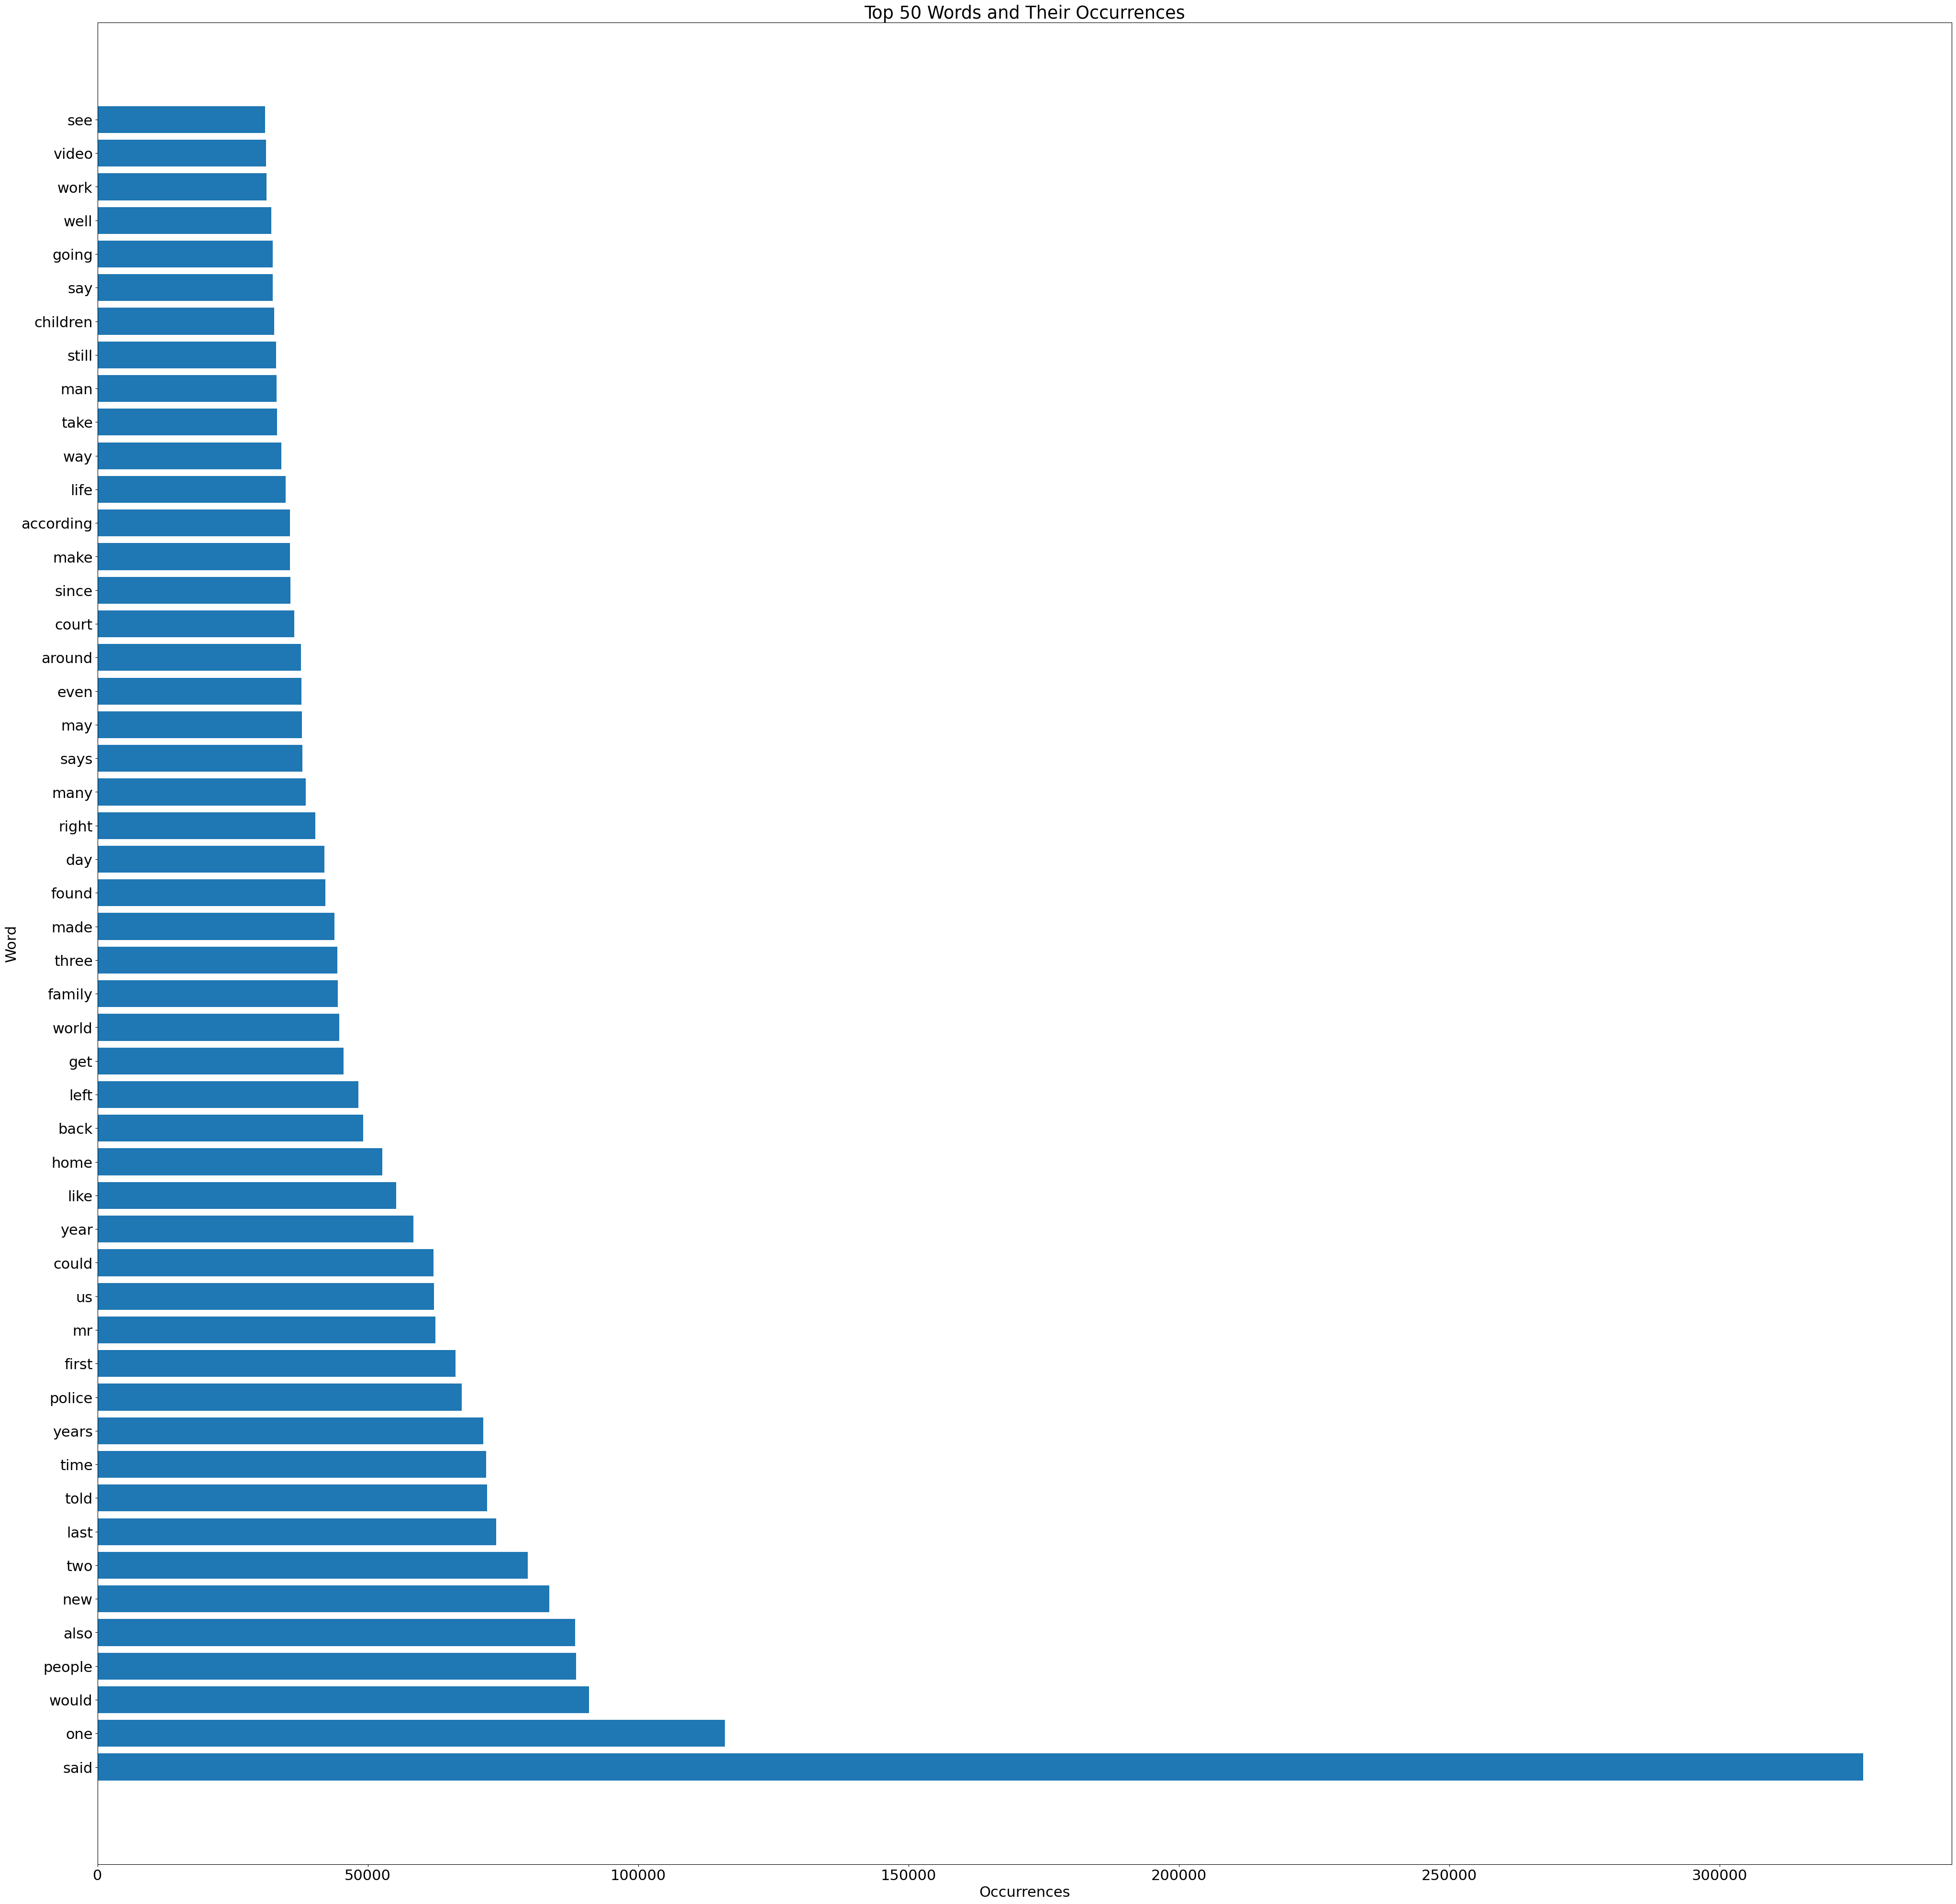

In [41]:
draw_word_distribution(filtered_word_freq_df, 50)

### Post-Stemming 

In [42]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
# filtered_list_split_words['stemmed_column'] = filtered_list_split_words[''].apply(stem_sentence)
stemmed = [stemmer.stem(word) for word in filtered_list_split_words]
stemmed

['nasa',
 'warn',
 'impend',
 'asteroid',
 'pass',
 'say',
 'closest',
 '2027',
 'asteroid',
 'design',
 '2004',
 'bl86',
 'safe',
 'pass',
 'three',
 'time',
 'distanc',
 'earth',
 'moon',
 'januari',
 '26',
 'closest',
 'known',
 'space',
 'rock',
 'larg',
 'asteroid',
 '1999',
 'an10',
 'fli',
 'past',
 'earth',
 '2027',
 'see',
 'asteroid',
 'rout',
 'time',
 'closest',
 'approach',
 'januari',
 '26',
 'asteroid',
 'approxim',
 '745000',
 'mile',
 '12',
 'million',
 'kilomet',
 'earth',
 'due',
 'orbit',
 'around',
 'sun',
 'asteroid',
 'current',
 'visibl',
 'astronom',
 'larg',
 'telescop',
 'locat',
 'southern',
 'hemispher',
 'jan',
 '26',
 'space',
 'rock',
 'chang',
 'posit',
 'make',
 'visibl',
 'northern',
 'hemispher',
 'reflect',
 'bright',
 'astronom',
 'estim',
 'asteroid',
 'third',
 'mile',
 '05',
 'kilomet',
 'size',
 'time',
 'closest',
 'approach',
 'januari',
 '26',
 'asteroid',
 'approxim',
 '745000',
 'mile',
 '12',
 'million',
 'kilomet',
 'earth',
 'monday',
 

### Unqiue words before stemming

In [44]:
len(set(filtered_list_split_words))

351405

### Unique words after stemming

In [43]:
len(set(stemmed))

280392

## Summary Data Analysis

In [45]:
train_df['split_highlights'] = train_df['highlights'].apply(lambda row: row.split())

In [46]:
train_df['split_highlights'].head()

272581    [2004, BL86, will, pass, about, three, times, ...
772       [Iraqi, Islamic, Party, calls, Quran, incident...
171868    [Carroll, takes, to, Instagram, to, post, self...
63167     [Pop, stars, from, all, over, Europe, are, set...
68522     [NEW:, Young, athletes, light, the, Olympic, c...
Name: split_highlights, dtype: object

In [47]:
train_df['len_split_highlights'] = train_df['split_highlights'].apply(len)
train_df[['split_highlights','len_split_highlights']]

,split_highlights,len_split_highlights
272581,"[2004, BL86, will, pass, about, three, times, ...",43
772,"[Iraqi, Islamic, Party, calls, Quran, incident...",46
171868,"[Carroll, takes, to, Instagram, to, post, self...",37
63167,"[Pop, stars, from, all, over, Europe, are, set...",43
68522,"[NEW:, Young, athletes, light, the, Olympic, c...",47
...,...,...
146978,"[Dr., Jim, Withers, has, been, treating, homel...",84
209646,"[The, castAR, system, uses, glasses, fitted, w...",45
239253,"[Richard, Pallot, TWICE, called, black, player...",32
126807,"[Christian, Hoard, psted, the, tweet, Wednesda...",102


In [48]:
train_df['len_split_highlights'].describe().transpose()

count    71778.000000
mean        51.544136
std         20.738407
min          6.000000
25%         38.000000
50%         48.000000
75%         60.000000
max        675.000000
Name: len_split_highlights, dtype: float64

In [49]:
combined_split_corpus = train_df['split_highlights'].explode()

In [50]:
combined_split_corpus.head()

272581     2004
272581     BL86
272581     will
272581     pass
272581    about
Name: split_highlights, dtype: object

In [51]:
split_corpus_list = list(combined_split_corpus)

In [52]:
train_df['sentences_highlights'] = train_df['highlights'].str.split('.')

train_df[['highlights','sentences_highlights']]

,highlights,sentences_highlights
272581,2004 BL86 will pass about three times the dist...,[2004 BL86 will pass about three times the dis...
772,"Iraqi Islamic Party calls Quran incident ""blat...","[Iraqi Islamic Party calls Quran incident ""bla..."
171868,Carroll takes to Instagram to post selfie ahea...,[Carroll takes to Instagram to post selfie ahe...
63167,Pop stars from all over Europe are setting the...,[Pop stars from all over Europe are setting th...
68522,NEW: Young athletes light the Olympic cauldron...,[NEW: Young athletes light the Olympic cauldro...
...,...,...
146978,Dr. Jim Withers has been treating homeless peo...,"[Dr, Jim Withers has been treating homeless p..."
209646,The castAR system uses glasses fitted with pro...,[The castAR system uses glasses fitted with pr...
239253,Richard Pallot TWICE called black players 'col...,[Richard Pallot TWICE called black players 'co...
126807,Christian Hoard psted the tweet Wednesday but ...,[Christian Hoard psted the tweet Wednesday but...


In [53]:
train_df['len_sentences_highlights'] = train_df['sentences_highlights'].apply(len)
train_df[['sentences_highlights','len_sentences_highlights']]

,sentences_highlights,len_sentences_highlights
272581,[2004 BL86 will pass about three times the dis...,4
772,"[Iraqi Islamic Party calls Quran incident ""bla...",9
171868,[Carroll takes to Instagram to post selfie ahe...,4
63167,[Pop stars from all over Europe are setting th...,7
68522,[NEW: Young athletes light the Olympic cauldro...,5
...,...,...
146978,"[Dr, Jim Withers has been treating homeless p...",8
209646,[The castAR system uses glasses fitted with pr...,5
239253,[Richard Pallot TWICE called black players 'co...,3
126807,[Christian Hoard psted the tweet Wednesday but...,7


In [54]:
train_df['len_sentences_highlights'].describe().transpose()

count    71778.000000
mean         4.834754
std          1.581749
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max         56.000000
Name: len_sentences_highlights, dtype: float64

### Number of Unique Words

### Pre-StopWords Removal

In [60]:
split_words = pd.DataFrame(combined_split_corpus)

In [61]:
split_words.columns

Index(['split_highlights'], dtype='object')

### Total Number of Words in the Corpus (With Repitition)

In [62]:
split_words.shape

(3699735, 1)

### Total Number of Unique Words in the Corpus 

In [63]:
unique_words_list = set(split_words['split_highlights'])
len(unique_words_list)

182613

In [64]:
list_split_words = list(split_words['split_highlights'])

In [65]:
fdist = FreqDist()

for word in list_split_words: 
    if(isinstance(word, str)):
        fdist[str(word).lower()]+= 1

dict_fdist = dict(fdist)

In [66]:
word_freq_df = pd.DataFrame.from_dict(dict_fdist.items())
word_freq_df.columns = columns=['word', 'count']

In [67]:
word_freq_df.sort_values(by=['count'], ascending=False, inplace=True)

### Word Count Before Filtration (With Repetition)

In [68]:
len(list_split_words)

3699735

### Unique Word Count Before Filtration

In [69]:
unfiltered_unique_words_count = len(set(list_split_words))

unfiltered_unique_words_count

182613

### Post-StopWords Removal

In [70]:
filtered_list_split_words = []

for word in list_split_words:
    filtered_word = re.sub(r"[^\w\s]", "", str(word).lower())
    if filtered_word not in stopwords_list and str(filtered_word).isalnum():
        filtered_list_split_words.append(filtered_word)

In [71]:
len(filtered_list_split_words)

2215923

In [72]:
filtered_fdist = FreqDist()

for word in filtered_list_split_words: 
    if(isinstance(word, str)):
        filtered_fdist[str(word).lower()]+= 1

filtered_dict_fdist = dict(filtered_fdist)    

### Length After Filtration

In [74]:
filtered_dict_fdist

{'2004': 277,
 'bl86': 2,
 'pass': 246,
 'three': 4418,
 'times': 1466,
 'distance': 84,
 'earth': 380,
 'moon': 179,
 'estimate': 76,
 'asteroid': 64,
 'third': 1178,
 'mile': 121,
 '05': 15,
 'kilometers': 39,
 'size': 404,
 'nasa': 200,
 'says': 17347,
 'poses': 64,
 'threat': 399,
 'foreseeable': 9,
 'future': 581,
 'iraqi': 193,
 'islamic': 314,
 'party': 1189,
 'calls': 1109,
 'quran': 26,
 'incident': 1321,
 'blatant': 12,
 'assault': 723,
 'muslim': 341,
 'holy': 77,
 'book': 810,
 'us': 5288,
 'soldier': 285,
 'used': 2425,
 'target': 439,
 'practice': 222,
 'military': 1163,
 'investigation': 944,
 'found': 5451,
 'commander': 127,
 'baghdad': 95,
 'issued': 328,
 'formal': 85,
 'apology': 188,
 'relieved': 32,
 'duty': 234,
 'reassigned': 3,
 'sending': 194,
 'letter': 436,
 'carroll': 106,
 'takes': 628,
 'instagram': 225,
 'post': 441,
 'selfie': 96,
 'ahead': 822,
 'ankle': 115,
 'surgery': 712,
 'west': 1642,
 'ham': 336,
 'star': 1565,
 'expected': 1324,
 'four': 2921,


In [75]:
filtered_word_freq_df = pd.DataFrame.from_dict(filtered_dict_fdist.items())
filtered_word_freq_df.columns = columns=['word', 'count']

In [76]:
filtered_word_freq_df.sort_values(by=['count'], ascending=False, inplace=True)
filtered_word_freq_df.head(30)

,word,count
16,says,17347
95,new,11537
134,said,10277
376,police,7373
388,two,7362
920,one,6990
226,also,6303
249,years,6260
141,last,5860
624,say,5628


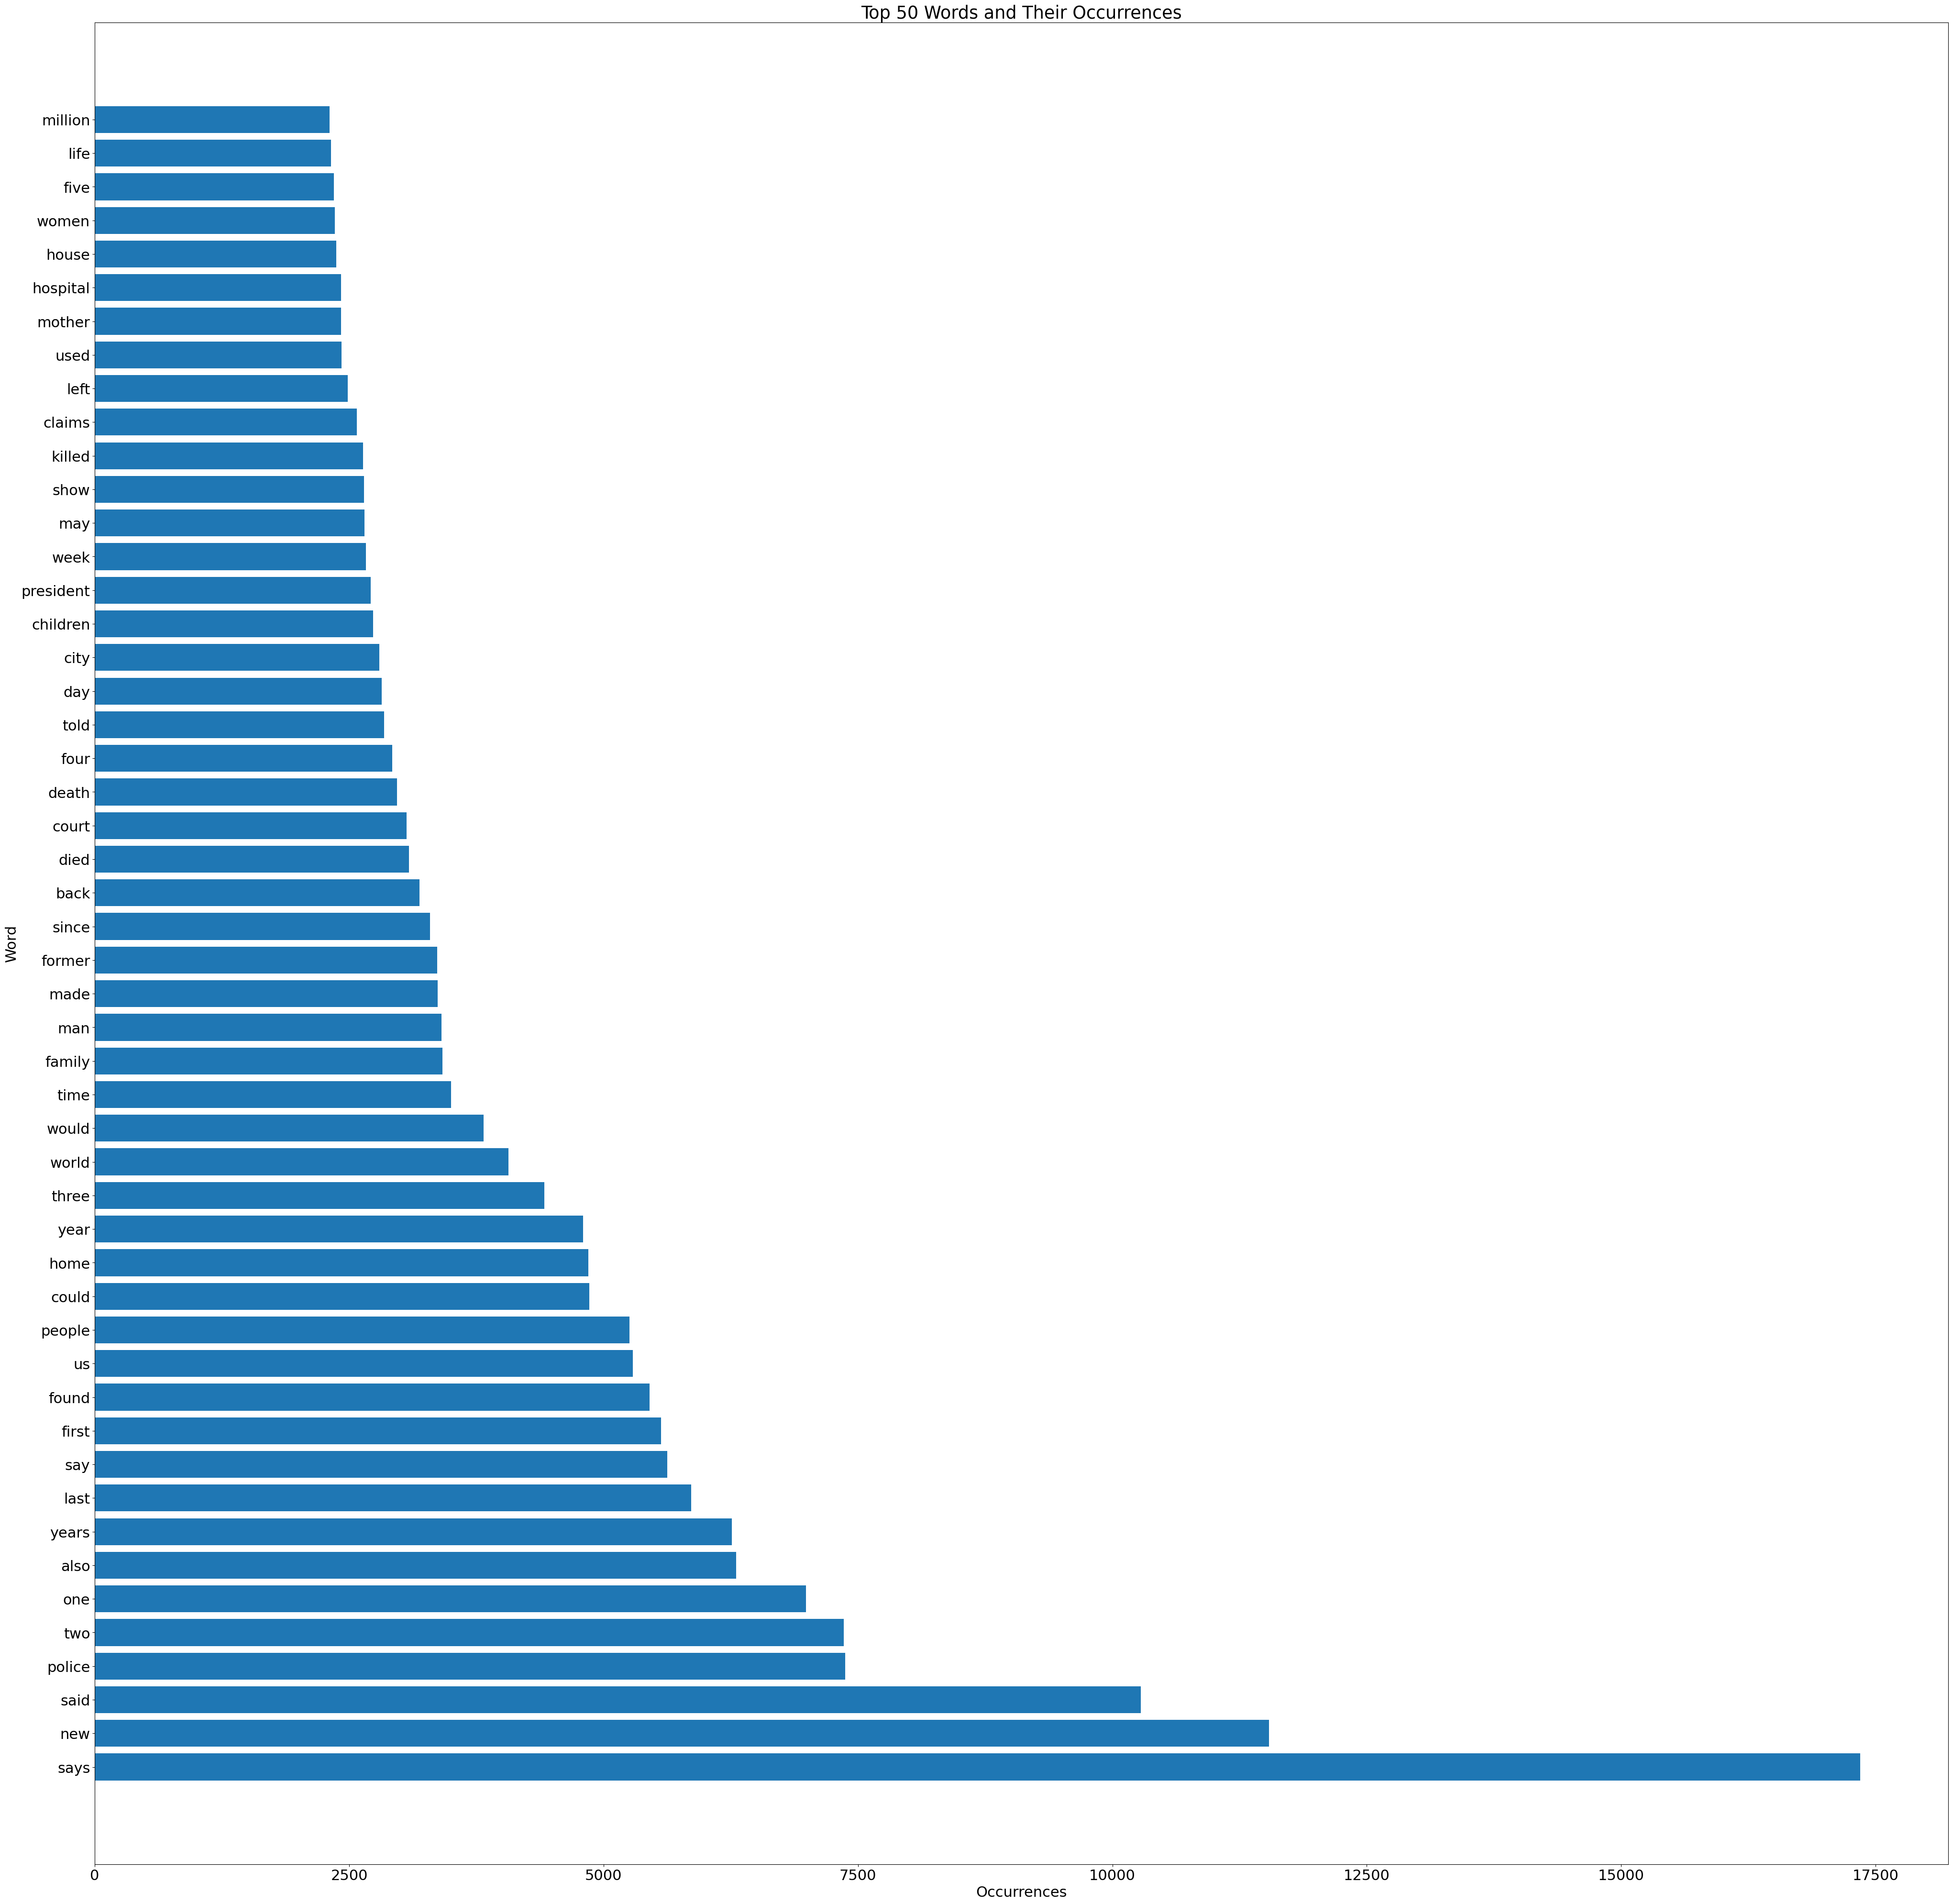

In [77]:
draw_word_distribution(filtered_word_freq_df, 50)

### Post-Stemming 

In [78]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
# filtered_list_split_words['stemmed_column'] = filtered_list_split_words[''].apply(stem_sentence)
stemmed = [stemmer.stem(word) for word in filtered_list_split_words]
stemmed

['2004',
 'bl86',
 'pass',
 'three',
 'time',
 'distanc',
 'earth',
 'moon',
 'estim',
 'asteroid',
 'third',
 'mile',
 '05',
 'kilomet',
 'size',
 'nasa',
 'say',
 'pose',
 'threat',
 'earth',
 'forese',
 'futur',
 'iraqi',
 'islam',
 'parti',
 'call',
 'quran',
 'incid',
 'blatant',
 'assault',
 'muslim',
 'holi',
 'book',
 'us',
 'soldier',
 'use',
 'quran',
 'target',
 'practic',
 'militari',
 'investig',
 'found',
 'us',
 'command',
 'baghdad',
 'issu',
 'formal',
 'apolog',
 'soldier',
 'reliev',
 'duti',
 'reassign',
 'send',
 'letter',
 'apolog',
 'carrol',
 'take',
 'instagram',
 'post',
 'selfi',
 'ahead',
 'ankl',
 'surgeri',
 'west',
 'ham',
 'star',
 'expect',
 'four',
 'month',
 'forward',
 'injuryravag',
 'spell',
 'sinc',
 'move',
 'liverpool',
 'pop',
 'star',
 'europ',
 'set',
 'sight',
 'us',
 'market',
 'estonia',
 'kerli',
 'itali',
 'marco',
 'bosco',
 'austria',
 'fawni',
 'want',
 'make',
 'big',
 'la',
 'lo',
 'angel',
 'long',
 'destin',
 'european',
 'artist'

### Unqiue words before stemming

In [79]:
len(set(filtered_list_split_words))

102655

### Unique words after stemming

In [80]:
len(set(stemmed))

77337